In [2]:
!pip install sklearn

In [1]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))
import pandas as pd

print('The pandas version is {}'.format(pd.__version__))
import matplotlib

print('The matplotlib version is {}'.format(matplotlib.__version__))
import numpy as np

print('The numpy version is {}'.format(np.__version__))

The scikit-learn version is 1.0.2.
The pandas version is 1.4.2
The matplotlib version is 3.5.1
The numpy version is 1.21.5


In [4]:
ice = pd.read_csv('./Data/SeaIce.txt', delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head()

shape: (5, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
print("Variables: {}".format(ice.columns.values))
ice.describe()

Variables: ['year' 'mo' 'data_type' 'region' 'extent' 'area']


,year,mo,extent,area
count,5.000000,5.0,5.000000,5.000000
mean,1981.000000,1.0,15.178000,12.006000
std,1.581139,0.0,0.230911,0.213378
min,1979.000000,1.0,14.960000,11.820000
25%,1980.000000,1.0,15.030000,11.850000
50%,1981.000000,1.0,15.100000,11.920000
75%,1982.000000,1.0,15.260000,12.110000
max,1983.000000,1.0,15.540000,12.330000


Text(0.5, 1.0, 'by Month')

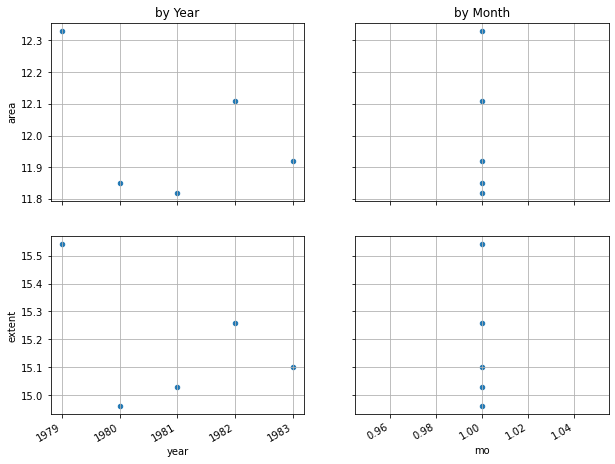

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ice.plot.scatter(x='year', y='area', legend=False, sharex=True, sharey=True, ax=ax1, grid=True)
ice.plot.scatter(x='year', y='extent', legend=False, ax=ax3, grid=True)
ice.plot.scatter(x='mo', y='area', legend=False, ax=ax2, grid=True)
ice.plot.scatter(x='mo', y='extent', legend=False, ax=ax4, grid=True)
fig.autofmt_xdate()
ax1.set_title('by Year')
ax2.set_title('by Month')

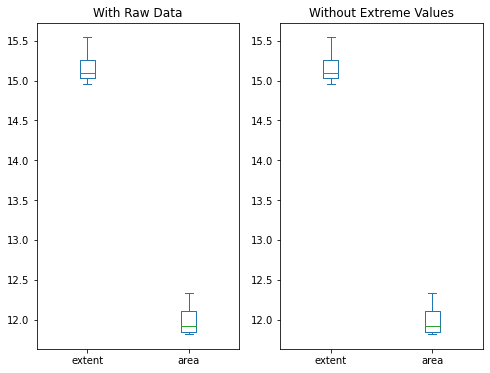

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ice[['extent', 'area']].plot.box(ax=axes[0])
ice.query('extent > 0 and area > 0')[['extent', 'area']].plot.box(ax=axes[1])  # this is removing the extreme
axes[0].set_title('With Raw Data')
plot_ = axes[1].set_title('Without Extreme Values')

## value_counts is a method that counts the number of times each type

In [10]:
ice['data_type'].value_counts()

Goddard    5
Name: data_type, dtype: int64

In [14]:
ice[(ice.data_type != 'Goddard') & (ice.data_type != 'NRTSI-G')]

,year,mo,data_type,region,extent,area


Text(0.5, 1.0, 'by Month')

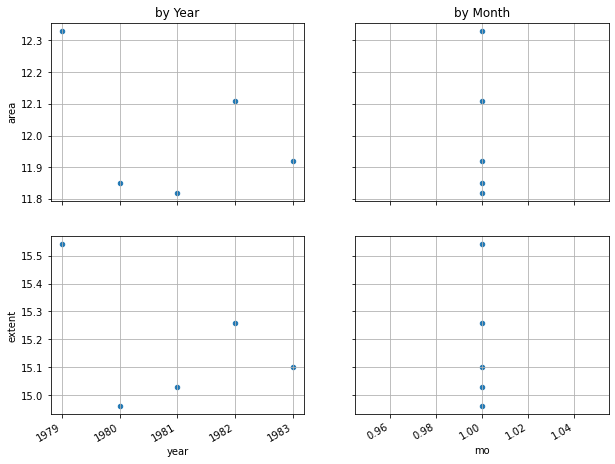

In [13]:
ice_cleaned = ice[ice['data_type'] != '-9999']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ice_cleaned.plot.scatter(x='year', y='area', legend=False, sharex=False, sharey=True, ax=ax1, grid=True);
ice_cleaned.plot.scatter(x='year', y='extent', legend=False, ax=ax3, grid=True)
ice_cleaned.plot.scatter(x='mo', y='area', legend=False, ax=ax2, grid=True)
ice_cleaned.plot.scatter(x='mo', y='extent', legend=False, ax=ax4, grid=True)
fig.autofmt_xdate()
ax1.set_title('by Year')
ax2.set_title('by Month')

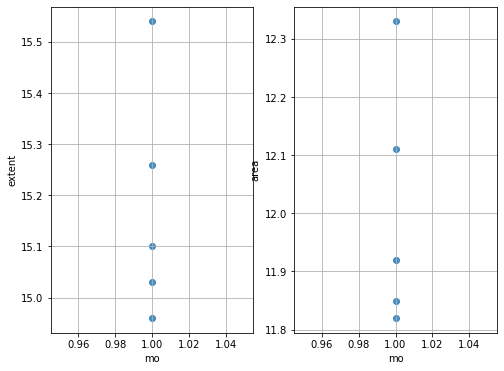

In [15]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x=ice_cleaned['mo'], y=ice_cleaned['extent'], ax=ax1)
ax1.grid(True)
plot_ = sns.regplot(x=ice_cleaned['mo'], y=ice_cleaned['area'], ax=ax2)
ax2.grid(True)
# the equivalent using lmplot() would be:
#sns.lmplot(x='mo', y='extent', data=ice)
# sns.lmplot(x='mo', y='area', data=ice);

In [17]:
grouped = ice_cleaned.groupby('mo')  # group by first so do not have to run multiple group by computations
ice_cleaned = ice_cleaned.assign(n_extent=grouped.extend.apply(lambda x: ((x.min()) / (x.max() - x.min()))))
ice_cleaned = ice_cleaned.assign(n_area=grouped.area.apply(lambda x: ((x.min()) / (x.max() - x.min()))))
ice_cleaned.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'extend'

KeyError: 'n_extent'

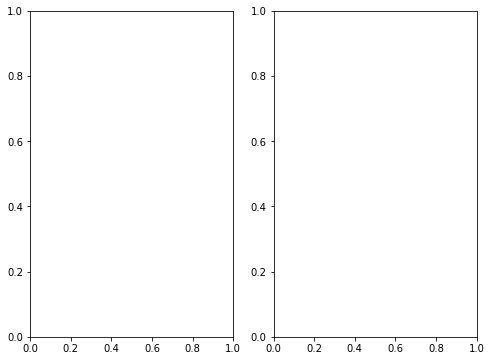

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x=ice_cleaned['year'], y=ice_cleaned['n_extent'], ax=ax1)
ax1.grid(True)
sns.regplot(x=ice_cleaned['year'], y=ice_cleaned['n_area'], ax=ax2)
ax2.grid(True)
ax1.set_title('Extent')
ax2.set_title('Area')
fig.autofmt_xdate()

In [19]:
ice_cleaned.corr(method='pearson')

,year,mo,extent,area
year,1.000000,NaN,-0.397149,-0.414963
mo,NaN,NaN,NaN,NaN
extent,-0.397149,NaN,1.000000,0.984651
area,-0.414963,NaN,0.984651,1.000000


In [20]:
from sklearn.feature_selection import f_regression as f_test
F_score_extent, p_value_extent = f_test(ice_cleaned[['year']], ice_cleaned['n_extent'])
F_score_area, p_value_area = f_test(ice_cleaned[['year']], ice_cleaned['n_area'])
pd.DataFrame(data={'extent~year':{'p_value':p_value_extent[0], 'F_score': F_score_extent[0]},
'area~year':{'p_value':p_value_area[0], 'F_score': F_score_area[0]}})

KeyError: 'n_extent'

In [ ]:
from sklearn import datasets, linear_model
X = ice_cleaned[['year']]
y = ice_cleaned[['n_extent']]
# Create linear regression object
model = linear_model.LinearRegression()
# Train the model using the training sets
model.fit(X, y)
# Make predictions using the testing set
y_pred = model.predict(X)
# polt the results
